In [15]:
##ONLINE COURSE COMPLETION PREDICTION 

In [16]:
## Step 1: Import Required Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [18]:
## Step 2: Load Dataset

In [19]:
df = pd.read_csv("/home/sahana/Documents/ml project 1/online_course_completion.csv")
df.head()

,age,continent,country,education_level,hours_per_week,num_logins_last_month,videos_watched_pct,assignments_submitted,discussion_posts,is_working_professional,preferred_device,completed_course,height_cm,weight_kg,num_siblings,has_pet,favorite_color,birth_month
0,56,Asia,Japan,Bachelors,9.116071,23,0.507679,7,1,1,mobile,0,175.0,54.1,2,0,red,May
1,46,Africa,Kenya,No Formal Education,0.454712,19,0.631424,1,1,1,desktop,0,168.6,57.7,3,0,black,Sep
2,32,South America,Brazil,Bachelors,4.946724,22,0.424817,2,2,0,console,0,176.5,80.2,2,1,green,Jul
3,25,Africa,Nigeria,Bachelors,5.053960,24,0.318874,3,0,1,console,0,185.2,76.3,1,0,purple,Jun
4,38,Asia,India,Bachelors,9.870424,28,1.000000,6,0,0,mobile,1,167.7,76.3,2,0,orange,Nov


In [20]:
## Step 3: Explore Dataset

In [21]:
df.info()        # structure, datatypes, missing values
df.describe()    # summary statistics
df.isnull().sum()# missing values count


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      500000 non-null  int64  
 1   continent                500000 non-null  object 
 2   country                  500000 non-null  object 
 3   education_level          475000 non-null  object 
 4   hours_per_week           500000 non-null  float64
 5   num_logins_last_month    500000 non-null  int64  
 6   videos_watched_pct       475000 non-null  float64
 7   assignments_submitted    500000 non-null  int64  
 8   discussion_posts         500000 non-null  int64  
 9   is_working_professional  500000 non-null  int64  
 10  preferred_device         475000 non-null  object 
 11  completed_course         500000 non-null  int64  
 12  height_cm                500000 non-null  float64
 13  weight_kg                500000 non-null  float64
 14  num_

age                            0
continent                      0
country                        0
education_level            25000
hours_per_week                 0
num_logins_last_month          0
videos_watched_pct         25000
assignments_submitted          0
discussion_posts               0
is_working_professional        0
preferred_device           25000
completed_course               0
height_cm                      0
weight_kg                      0
num_siblings                   0
has_pet                        0
favorite_color                 0
birth_month                    0
dtype: int64

In [22]:
## Step 4: Select Features and Target

In [23]:
features = ['age', 'continent', 'education_level', 'hours_per_week',
            'num_logins_last_month', 'videos_watched_pct',
            'assignments_submitted', 'discussion_posts',
            'is_working_professional', 'preferred_device']

X = df[features]
y = df['completed_course']


In [24]:
X.head()

,age,continent,education_level,hours_per_week,num_logins_last_month,videos_watched_pct,assignments_submitted,discussion_posts,is_working_professional,preferred_device
0,56,Asia,Bachelors,9.116071,23,0.507679,7,1,1,mobile
1,46,Africa,No Formal Education,0.454712,19,0.631424,1,1,1,desktop
2,32,South America,Bachelors,4.946724,22,0.424817,2,2,0,console
3,25,Africa,Bachelors,5.053960,24,0.318874,3,0,1,console
4,38,Asia,Bachelors,9.870424,28,1.000000,6,0,0,mobile


In [25]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: completed_course, dtype: int64

In [26]:
## Step 5: Handle Missing Values

In [27]:
X.loc[:, 'education_level'] = X['education_level'].fillna(X['education_level'].mode()[0])
X.loc[:, 'videos_watched_pct'] = X['videos_watched_pct'].fillna(X['videos_watched_pct'].median())
X.loc[:, 'preferred_device'] = X['preferred_device'].fillna(X['preferred_device'].mode()[0])

X.isnull().sum()


age                        0
continent                  0
education_level            0
hours_per_week             0
num_logins_last_month      0
videos_watched_pct         0
assignments_submitted      0
discussion_posts           0
is_working_professional    0
preferred_device           0
dtype: int64

In [28]:
## Step 6: Encode Categorical Variables

In [29]:
X_encoded = pd.get_dummies(X, columns=['continent', 'education_level', 'preferred_device'], drop_first=True)
X_encoded.head()


,age,hours_per_week,num_logins_last_month,videos_watched_pct,assignments_submitted,discussion_posts,is_working_professional,continent_Antarctica,continent_Asia,continent_Europe,...,education_level_Diploma,education_level_High School,education_level_Masters,education_level_No Formal Education,education_level_PhD,preferred_device_desktop,preferred_device_mobile,preferred_device_pager,preferred_device_smart_tv,preferred_device_tablet
0,56,9.116071,23,0.507679,7,1,1,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1,46,0.454712,19,0.631424,1,1,1,False,False,False,...,False,False,False,True,False,True,False,False,False,False
2,32,4.946724,22,0.424817,2,2,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,25,5.053960,24,0.318874,3,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,38,9.870424,28,1.000000,6,0,0,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [30]:
## Step 7: Feature Engineering

In [31]:
df['BMI'] = df['weight_kg'] / (df['height_cm'] / 100) ** 2
df['engagement_score'] = df['videos_watched_pct'] + df['assignments_submitted'] + df['discussion_posts']

X_encoded['BMI'] = df['BMI']
X_encoded['engagement_score'] = df['engagement_score'].fillna(df['engagement_score'].median())


In [32]:
## Step 8: Scale Features

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled.shape


(500000, 24)

In [34]:
## Step 9: Train-Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [36]:
## Step 10:  Model Training (Logistic Regression, Random Forest, Gradient Boosting)


Logistic Regression Accuracy: 0.8527
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     75015
           1       0.78      0.57      0.66     24985

    accuracy                           0.85    100000
   macro avg       0.82      0.76      0.78    100000
weighted avg       0.85      0.85      0.84    100000



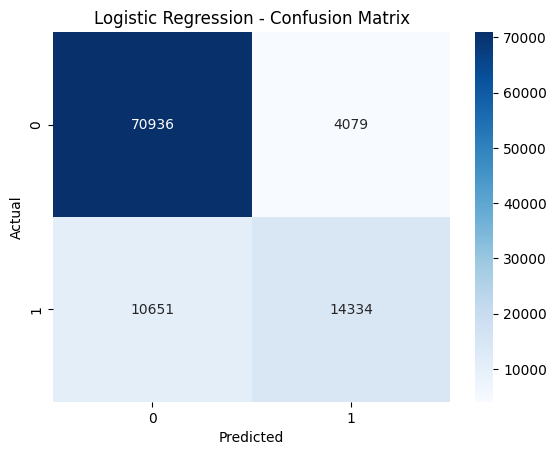


Random Forest Accuracy: 0.9514
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     75015
           1       1.00      0.81      0.89     24985

    accuracy                           0.95    100000
   macro avg       0.97      0.90      0.93    100000
weighted avg       0.95      0.95      0.95    100000



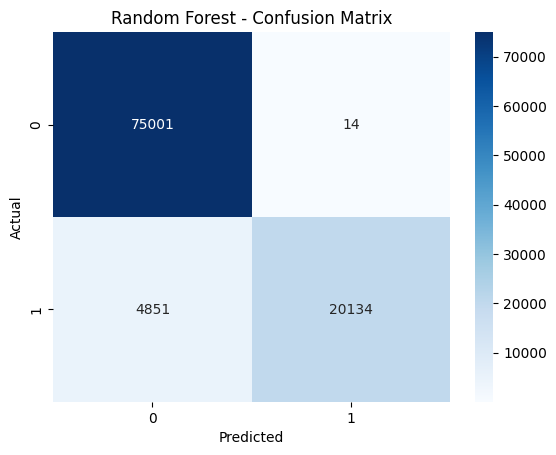


Gradient Boosting Accuracy: 0.9625
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     75015
           1       0.99      0.86      0.92     24985

    accuracy                           0.96    100000
   macro avg       0.97      0.93      0.95    100000
weighted avg       0.96      0.96      0.96    100000



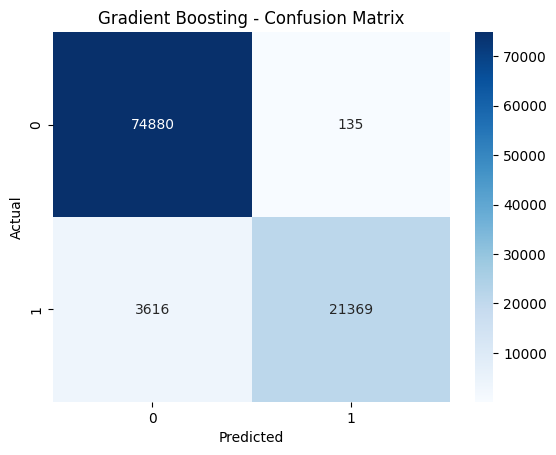

In [37]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    results[name] = acc


In [38]:
# Step 11: Compare Model Accuracies

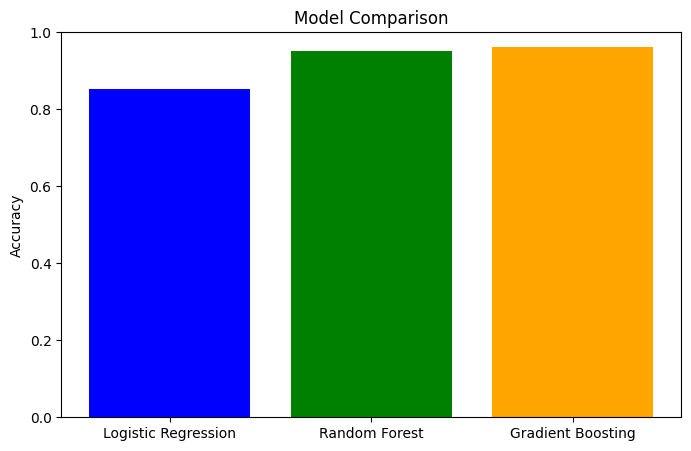

In [40]:
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange'])
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()